[*********************100%***********************]  1 of 1 completed


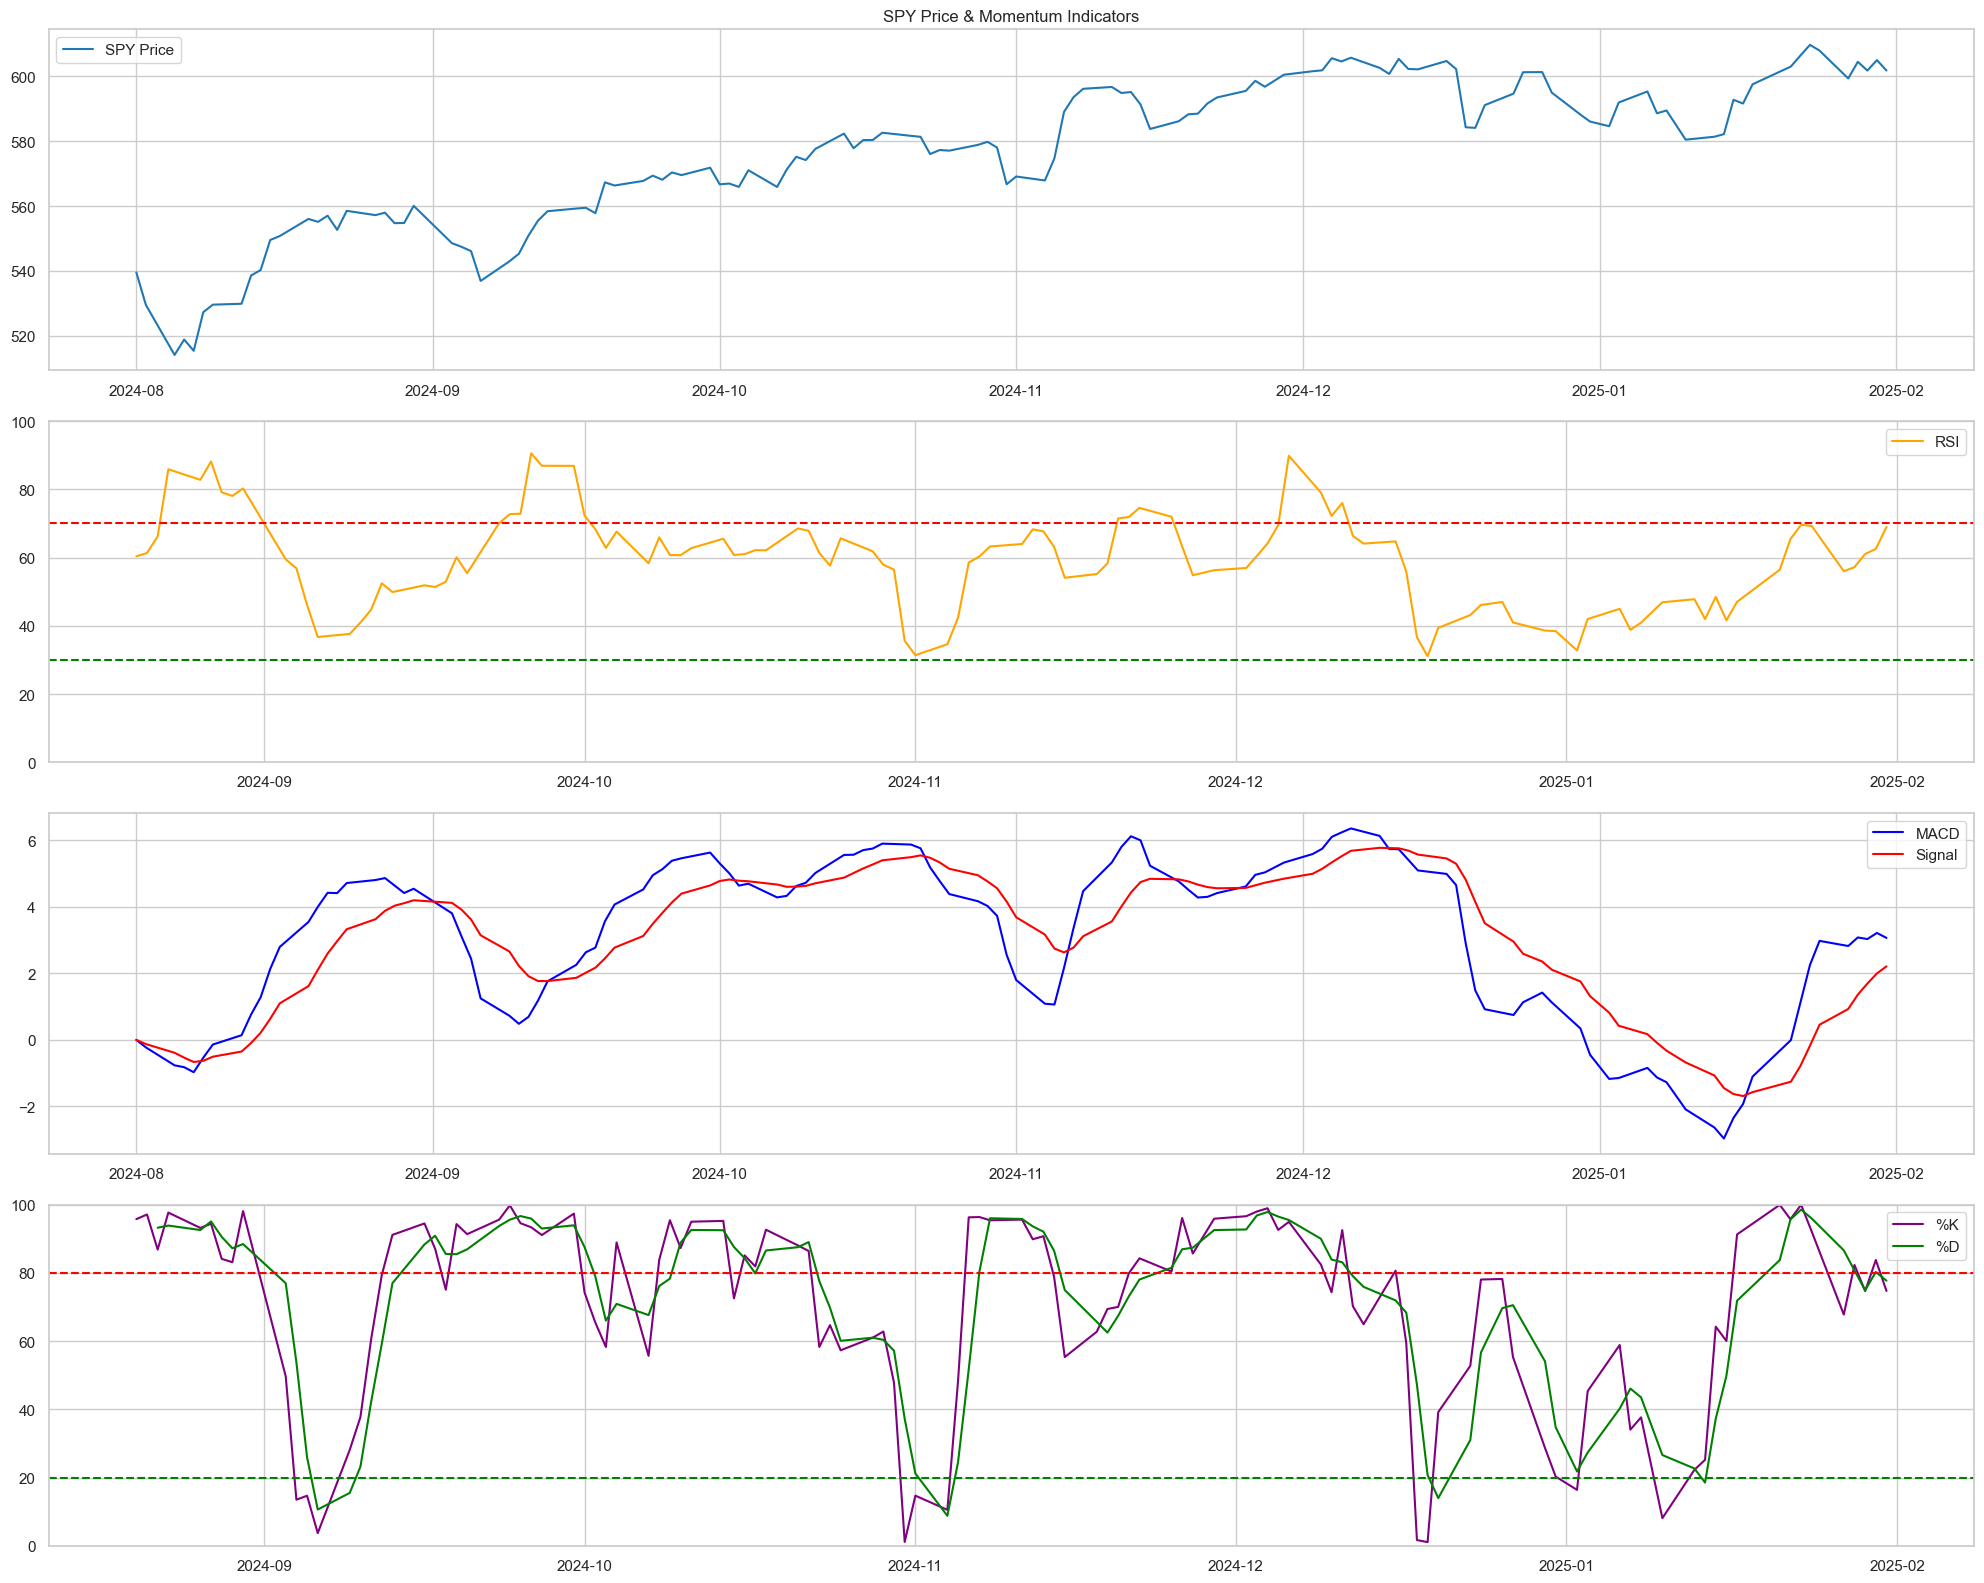

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

# Get SPY data
spy = yf.download('SPY', period='6mo')

# Calculate momentum indicators
# RSI
delta = spy['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
spy['RSI'] = 100 - (100 / (1 + rs))

# MACD
spy['EMA12'] = spy['Close'].ewm(span=12).mean()
spy['EMA26'] = spy['Close'].ewm(span=26).mean()
spy['MACD'] = spy['EMA12'] - spy['EMA26']
spy['Signal'] = spy['MACD'].ewm(span=9).mean()

# Stochastic Oscillator
high14 = spy['High'].rolling(14).max()
low14 = spy['Low'].rolling(14).min()
spy['%K'] = (spy['Close'] - low14) * 100 / (high14 - low14)
spy['%D'] = spy['%K'].rolling(3).mean()

# CCI
tp = (spy['High'] + spy['Low'] + spy['Close']) / 3
spy['CCI'] = (tp - tp.rolling(20).mean()) / (0.015 * tp.rolling(20).std())

# Plotting
plt.figure(figsize=(20, 16))

# Price Plot
plt.subplot(4, 1, 1)
plt.plot(spy['Close'], label='SPY Price', color='#1f77b4')
plt.title('SPY Price & Momentum Indicators')
plt.legend()

# RSI Plot
plt.subplot(4, 1, 2)
plt.plot(spy['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.ylim(0, 100)
plt.legend()

# MACD Plot
plt.subplot(4, 1, 3)
plt.plot(spy['MACD'], label='MACD', color='blue')
plt.plot(spy['Signal'], label='Signal', color='red')
plt.legend()

# Stochastic Plot
plt.subplot(4, 1, 4)
plt.plot(spy['%K'], label='%K', color='purple')
plt.plot(spy['%D'], label='%D', color='green')
plt.axhline(80, linestyle='--', color='red')
plt.axhline(20, linestyle='--', color='green')
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Get SPY data
ticker = 'SPY'
data = yf.download(ticker, period='6mo', interval='1d')

# =================================================================
# CALCULATE ALL MOMENTUM INDICATORS
# =================================================================

# 1. RSI (Relative Strength Index)
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# 2. MACD (Moving Average Convergence Divergence)
data['EMA12'] = data['Close'].ewm(span=12).mean()
data['EMA26'] = data['Close'].ewm(span=26).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9).mean()

# 3. Stochastic Oscillator
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14) * 100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

# 4. CCI (Commodity Channel Index)
tp = (data['High'] + data['Low'] + data['Close']) / 3
data['CCI'] = (tp - tp.rolling(20).mean()) / (0.015 * tp.rolling(20).std())

# 5. Williams %R
data['Williams_%R'] = (high14 - data['Close']) / (high14 - low14) * -100

# 6. Rate of Change (ROC)
data['ROC'] = data['Close'].pct_change(periods=14) * 100

# 7. Money Flow Index (MFI)
typical_price = (data['High'] + data['Low'] + data['Close']) / 3
money_flow = typical_price * data['Volume']
positive_flow = money_flow.where(typical_price > typical_price.shift(1), 0)
negative_flow = money_flow.where(typical_price < typical_price.shift(1), 0)
mfi_ratio = positive_flow.rolling(14).sum() / negative_flow.rolling(14).sum()
data['MFI'] = 100 - (100 / (1 + mfi_ratio))

# 8. TRIX (Triple Exponential Average)
ema1 = data['Close'].ewm(span=15).mean()
ema2 = ema1.ewm(span=15).mean()
ema3 = ema2.ewm(span=15).mean()
data['TRIX'] = ema3.pct_change() * 100

# 9. Ultimate Oscillator
min_low = data['Low'].rolling(7).min()
max_high = data['High'].rolling(7).max()
buy_pressure = data['Close'] - min_low
tr = max_high - min_low
avg7 = buy_pressure.rolling(7).sum() / tr.rolling(7).sum()
avg14 = buy_pressure.rolling(14).sum() / tr.rolling(14).sum()
avg28 = buy_pressure.rolling(28).sum() / tr.rolling(28).sum()
data['Ultimate'] = (4*avg7 + 2*avg14 + avg28) / 7 * 100

# 10. Force Index
data['Force_Index'] = data['Close'].diff(13) * data['Volume'].rolling(13).mean()

# 11. Chaikin Oscillator
ad = ((2*data['Close'] - data['High'] - data['Low']) / (data['High'] - data['Low'])) * data['Volume']
data['Chaikin'] = ad.ewm(span=3).mean() - ad.ewm(span=10).mean()

# 12. Bollinger Bands
data['MA20'] = data['Close'].rolling(20).mean()
data['Upper_BB'] = data['MA20'] + 2*data['Close'].rolling(20).std()
data['Lower_BB'] = data['MA20'] - 2*data['Close'].rolling(20).std()

# 13. Elder Ray Index
data['Elder_Bull'] = data['High'] - data['EMA26']
data['Elder_Bear'] = data['Low'] - data['EMA26']

# 14. Vortex Indicator
tr = pd.concat([data['High'] - data['Low'], 
                abs(data['High'] - data['Close'].shift(1)),
                abs(data['Low'] - data['Close'].shift(1))], axis=1).max(axis=1)
vm_plus = abs(data['High'] - data['Low'].shift(1))
vm_minus = abs(data['Low'] - data['High'].shift(1))
data['Vortex+'] = vm_plus.rolling(14).sum() / tr.rolling(14).sum()
data['Vortex-'] = vm_minus.rolling(14).sum() / tr.rolling(14).sum()

# =================================================================
# VISUALIZATION (ADJUSTED FOR ALL INDICATORS)
# =================================================================
plt.figure(figsize=(20, 35))

# Price & Bollinger Bands
ax1 = plt.subplot(8, 2, 1)
plt.plot(data['Close'], label='Price', color='#1f77b4')
plt.plot(data['Upper_BB'], linestyle='--', color='red', alpha=0.7)
plt.plot(data['Lower_BB'], linestyle='--', color='green', alpha=0.7)
plt.fill_between(data.index, data['Upper_BB'], data['Lower_BB'], color='grey', alpha=0.1)
plt.title(f'{ticker} Price with Bollinger Bands')
plt.legend()

# RSI
plt.subplot(8, 2, 2, sharex=ax1)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.ylim(0, 100)
plt.title('RSI')

# MACD
plt.subplot(8, 2, 3, sharex=ax1)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('MACD')

# Stochastic
plt.subplot(8, 2, 4, sharex=ax1)
plt.plot(data['%K'], label='%K', color='purple')
plt.plot(data['%D'], label='%D', color='green')
plt.axhline(80, linestyle='--', color='red')
plt.axhline(20, linestyle='--', color='green')
plt.title('Stochastic Oscillator')

# CCI
plt.subplot(8, 2, 5, sharex=ax1)
plt.plot(data['CCI'], label='CCI', color='brown')
plt.axhline(100, linestyle='--', color='red')
plt.axhline(-100, linestyle='--', color='green')
plt.title('CCI')

# Williams %R
plt.subplot(8, 2, 6, sharex=ax1)
plt.plot(data['Williams_%R'], label='Williams %R', color='cyan')
plt.axhline(-20, linestyle='--', color='red')
plt.axhline(-80, linestyle='--', color='green')
plt.title('Williams %R')

# MFI
plt.subplot(8, 2, 7, sharex=ax1)
plt.plot(data['MFI'], label='MFI', color='magenta')
plt.axhline(80, linestyle='--', color='red')
plt.axhline(20, linestyle='--', color='green')
plt.title('Money Flow Index')

# Vortex
plt.subplot(8, 2, 8, sharex=ax1)
plt.plot(data['Vortex+'], label='Vortex+', color='darkgreen')
plt.plot(data['Vortex-'], label='Vortex-', color='darkred')
plt.title('Vortex Indicator')

# Ultimate Oscillator
plt.subplot(8, 2, 9, sharex=ax1)
plt.plot(data['Ultimate'], label='Ultimate', color='navy')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('Ultimate Oscillator')

# Elder Ray
plt.subplot(8, 2, 10, sharex=ax1)
plt.bar(data.index, data['Elder_Bull'], color='green', alpha=0.5)
plt.bar(data.index, data['Elder_Bear'], color='red', alpha=0.5)
plt.title('Elder Ray Index')

# Force Index
plt.subplot(8, 2, 11, sharex=ax1)
plt.plot(data['Force_Index'], label='Force Index', color='teal')
plt.axhline(0, color='black')
plt.title('Force Index')

# Chaikin Oscillator
plt.subplot(8, 2, 12, sharex=ax1)
plt.plot(data['Chaikin'], label='Chaikin', color='goldenrod')
plt.axhline(0, color='black')
plt.title('Chaikin Oscillator')

# TRIX
plt.subplot(8, 2, 13, sharex=ax1)
plt.plot(data['TRIX'], label='TRIX', color='darkviolet')
plt.axhline(0, color='black')
plt.title('TRIX')

# ROC
plt.subplot(8, 2, 14, sharex=ax1)
plt.plot(data['ROC'], label='ROC', color='steelblue')
plt.axhline(0, color='black')
plt.title('Rate of Change (ROC)')

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Upper_BB